## Binary Classification: Breast Cancer Wisconsin Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

** Dataset Information: **

characteristics of the cell nuclei from a digitized image of a fine needle aspirate (FNA) of a breast mass (total 569 instances). 

** Attribute Information: (31 features and 1 class)**

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

** Objective of this project **

predict whether a patient's breast tumor is malignant or benign (class; M or B) based on cell nuclei characteristics (features)

## Data

In [48]:
#options(warn=-1)
# Load Data
df  <- read.csv('wdbc.data',header=FALSE)

In [49]:
# Inspect Data
head(df,3)
colnames(df)[2] <- 'label' #class -> label

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
842302,M,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [50]:
dim(df)

[1] 569  32

In [51]:
str(df)

'data.frame':	569 obs. of  32 variables:
 $ V1   : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ label: Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3   : num  18 20.6 19.7 11.4 20.3 ...
 $ V4   : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V5   : num  122.8 132.9 130 77.6 135.1 ...
 $ V6   : num  1001 1326 1203 386 1297 ...
 $ V7   : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V8   : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V9   : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V10  : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V11  : num  0.242 0.181 0.207 0.26 0.181 ...
 $ V12  : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V13  : num  1.095 0.543 0.746 0.496 0.757 ...
 $ V14  : num  0.905 0.734 0.787 1.156 0.781 ...
 $ V15  : num  8.59 3.4 4.58 3.44 5.44 ...
 $ V16  : num  153.4 74.1 94 27.2 94.4 ...
 $ V17  : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V18  : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
 $ V19  : num

In [52]:
summary(df)

       V1            label         V3               V4              V5        
 Min.   :     8670   B:357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 1st Qu.:   869218   M:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Median :   906024           Median :13.370   Median :18.84   Median : 86.24  
 Mean   : 30371831           Mean   :14.127   Mean   :19.29   Mean   : 91.97  
 3rd Qu.:  8813129           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
 Max.   :911320502           Max.   :28.110   Max.   :39.28   Max.   :188.50  
       V6               V7                V8                V9         
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0

In [53]:
table(df$label) #imbalanced labels


  B   M 
357 212 

In [54]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [55]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode label **

In [56]:
#df$label = factor(df$label, labels=c(0,1))
#table(df$label)
#str(df)

** Split Train Test Sets **

In [57]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [58]:
# standardize data
train_set[-2] = scale(train_set[-2])
test_set[-2] = scale(test_set[-2])
#summary(train_set)

## Baseline Model

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"Warning message in FUN(X[[

"Numerical 0 probability for all classes with observation 7"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 10"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 11"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 13"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 14"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 15"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 16"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 17"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabilit

"Numerical 0 probability for all classes with observation 24"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 25"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 26"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 29"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 30"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 33"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 24"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 25"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 26"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 30"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 34"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 35"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 37"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 41"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 42"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 43"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 44"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 45"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 46"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 47"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 48"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 49"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 50"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 47"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 48"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 49"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 50"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 51"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 52"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 55"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 56"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 57"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 59"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 55"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 56"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 57"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 59"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 60"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 62"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 63"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 64"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 65"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 67"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 72"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 73"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 75"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 76"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 79"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 80"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 81"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 82"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 83"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 84"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 72"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 73"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 74"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 75"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 76"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 77"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 78"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 79"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 80"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 81"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi


Call:
summary.resamples(object = results)

Models: lda, logistic, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda      0.9239130 0.9450549 0.9450549 0.9452222 0.9560440 0.9560440    0
logistic 0.9230769 0.9230769 0.9450549 0.9473244 0.9673913 0.9780220    0
glmnet   0.9670330 0.9670330 0.9673913 0.9736980 0.9780220 0.9890110    0
svm      0.9340659 0.9560440 0.9673913 0.9627090 0.9780220 0.9780220    0
knn      0.9450549 0.9560440 0.9560440 0.9670807 0.9782609 1.0000000    0
nb       0.9230769 0.9340659 0.9340659 0.9363832 0.9450549 0.9456522    0
cart     0.8791209 0.9120879 0.9230769 0.9144529 0.9239130 0.9340659    0
c50      0.9340659 0.9560440 0.9565217 0.9561395 0.9670330 0.9670330    0
bagging  0.8791209 0.9340659 0.9340659 0.9385093 0.9670330 0.9782609    0
rf       0.9340659 0.9450549 0.9560440 0.9539417 0.9565217 0.9780220    0
gbm      0.9450549 0.9560440 0.95

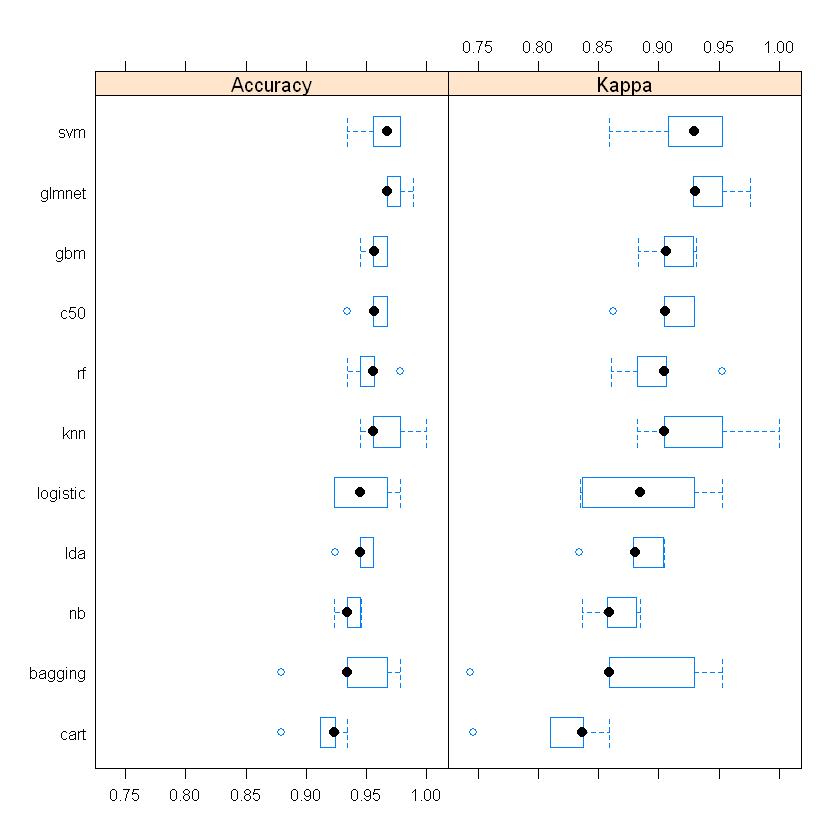

In [59]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"

# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
set.seed(seed)
fit.glm <- train(label~., data=train_set, method="glm", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms: glmnet, knn, svm, gbm

tuning parameters: http://topepo.github.io/caret/available-models.html

In [60]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: GLMNET


glmnet 

456 samples
 31 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.000   0.9517200  0.8968263
  0.001   0.9693263  0.9336818
  0.002   0.9715241  0.9386319
  0.003   0.9693263  0.9336325
  0.004   0.9715241  0.9384706
  0.005   0.9671285  0.9288529
  0.006   0.9671285  0.9288529
  0.007   0.9671285  0.9288529
  0.008   0.9671285  0.9288529
  0.009   0.9649307  0.9240158
  0.010   0.9649307  0.9240158
  0.011   0.9649307  0.9240158
  0.012   0.9627329  0.9192372
  0.013   0.9627329  0.9192372
  0.014   0.9627329  0.9192372
  0.015   0.9605351  0.9143991
  0.016   0.9605351  0.9143991
  0.017   0.9605351  0.9143991
  0.018   0.9605351  0.9143991
  0.019   0.9627329  0.9192362
  0.020   0.9627329  0.9192362
  0.021   0.9605351  0.9143393
  0.022   0.9605351  0.9143393
  0.023   0.9627329  0.9191189
  0.024   0.96

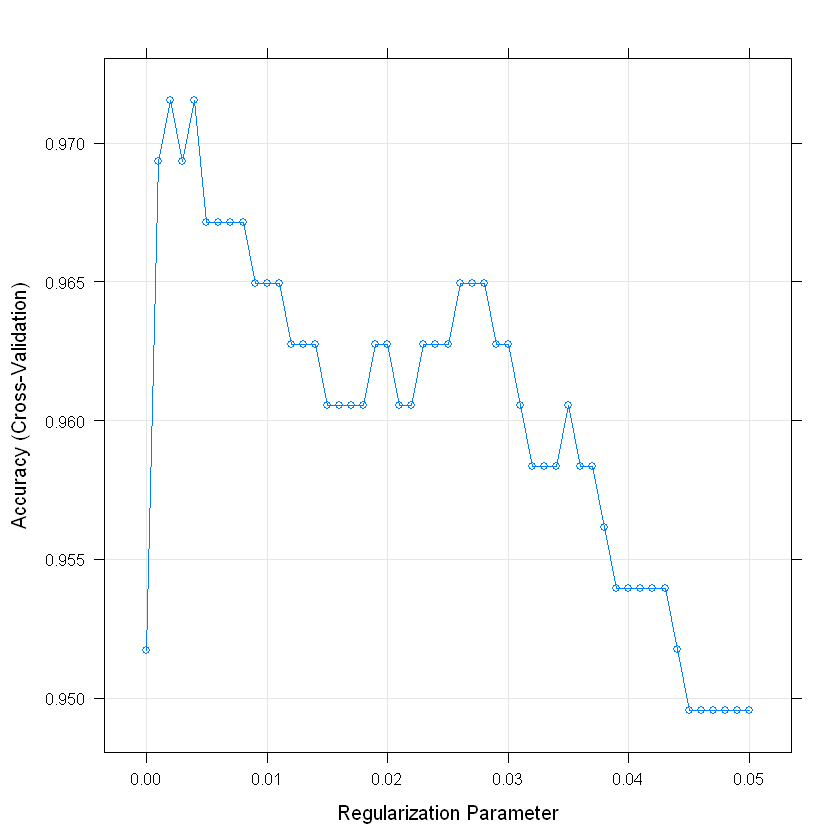

In [61]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = 1,lambda = seq(0,0.05,by = 0.001))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2. K-Nearest Neighbors

k-Nearest Neighbors 

456 samples
 31 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9539417  0.9010149
   2  0.9516722  0.8970485
   3  0.9671046  0.9288307
   4  0.9583134  0.9101065
   5  0.9605112  0.9149446
   6  0.9649068  0.9240504
   7  0.9670807  0.9289208
   8  0.9692785  0.9335866
   9  0.9648829  0.9239105
  10  0.9648829  0.9240803
  11  0.9605112  0.9137964
  12  0.9605112  0.9137989
  13  0.9583134  0.9091362
  14  0.9539656  0.8993912
  15  0.9561395  0.9040919

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 8.


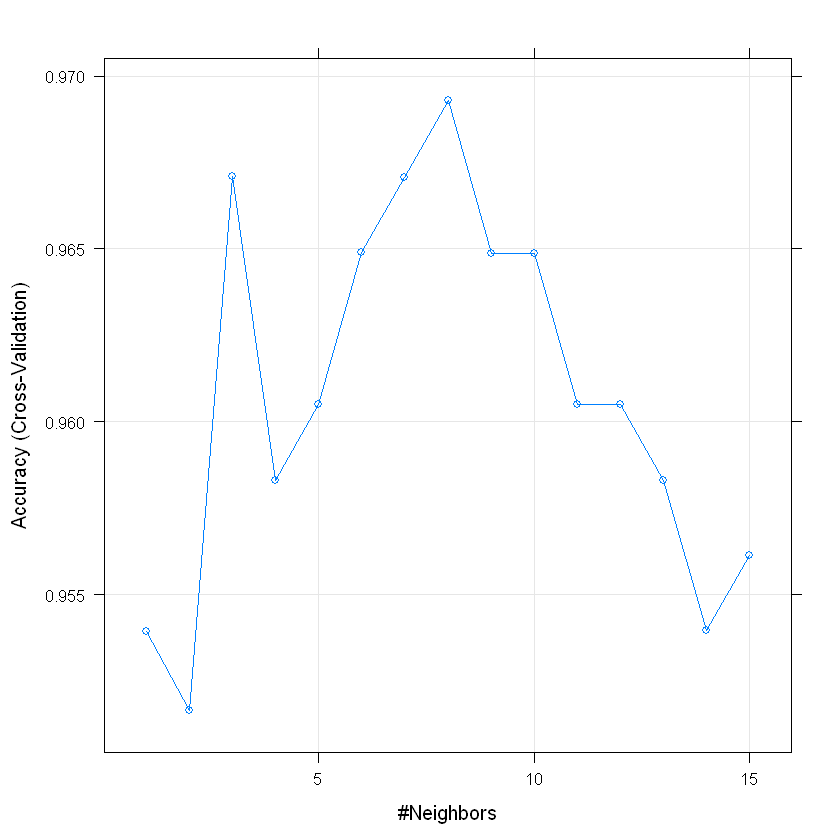

In [62]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.k=c(1:15))
gridSearch <- train(label~., data=train_set, method='knn',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4. Support Vector Machine 

Support Vector Machines with Radial Basis Function Kernel 

456 samples
 31 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  sigma  C    Accuracy   Kappa     
  0.001  0.1  0.7258720  0.30810480
  0.001  1.0  0.9517439  0.89400399
  0.001  2.0  0.9561395  0.90385769
  0.001  4.0  0.9649307  0.92344636
  0.001  5.0  0.9627329  0.91848957
  0.001  6.0  0.9627329  0.91848957
  0.001  8.0  0.9605590  0.91355781
  0.010  0.1  0.9495461  0.88963369
  0.010  1.0  0.9627329  0.91860828
  0.010  2.0  0.9736742  0.94297537
  0.010  4.0  0.9758720  0.94787089
  0.010  5.0  0.9758720  0.94787089
  0.010  6.0  0.9780698  0.95265121
  0.010  8.0  0.9758958  0.94784060
  0.100  0.1  0.9297898  0.85168572
  0.100  1.0  0.9473483  0.88936663
  0.100  2.0  0.9495461  0.89324868
  0.100  4.0  0.9517200  0.89832142
  0.100  5.0  0.9495222  0.89381621
  0.100  6.0  0.94

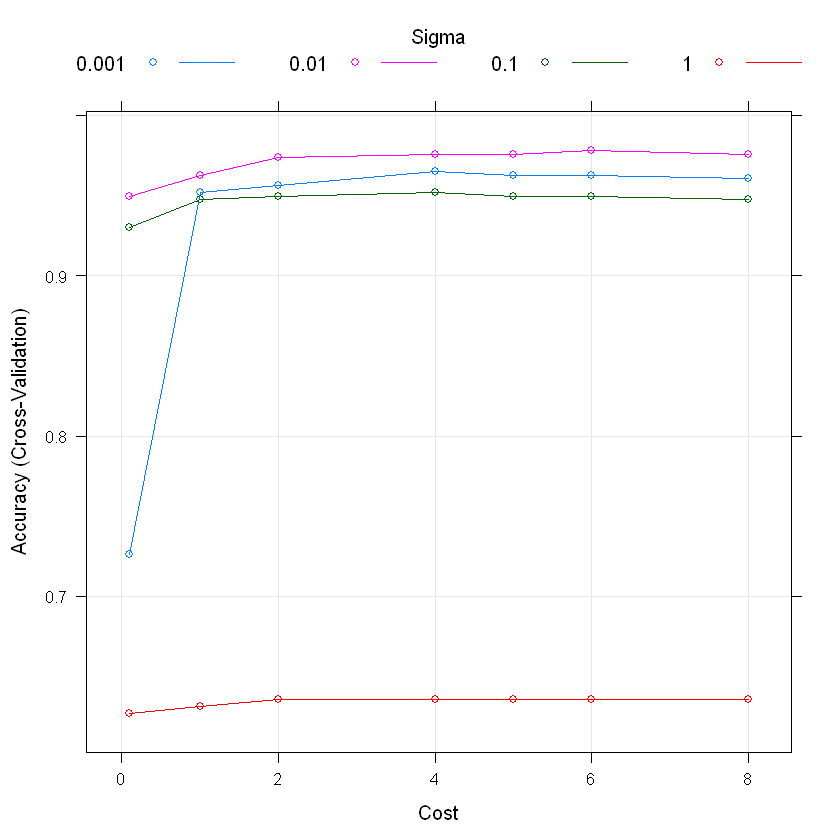

In [63]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.001,0.01,0.1,1), .C=c(0.1,1,2,4,5,6,8))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4: Stochastic Gradient Boosting

Stochastic Gradient Boosting 

456 samples
 31 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01       1                  10              200      0.9320115  0.8526854
  0.01       1                  10              300      0.9407788  0.8724135
  0.01       1                  10              400      0.9473722  0.8862469
  0.01       1                  10              500      0.9561634  0.9050298
  0.01       1                  20              200      0.9364071  0.8625276
  0.01       1                  20              300      0.9430005  0.8763023
  0.01       1                  20              400      0.9473961  0.8858062
  0.01       1                  20              500      0.9539656  0.9005298
  0.01       3                  10              200      0.942952

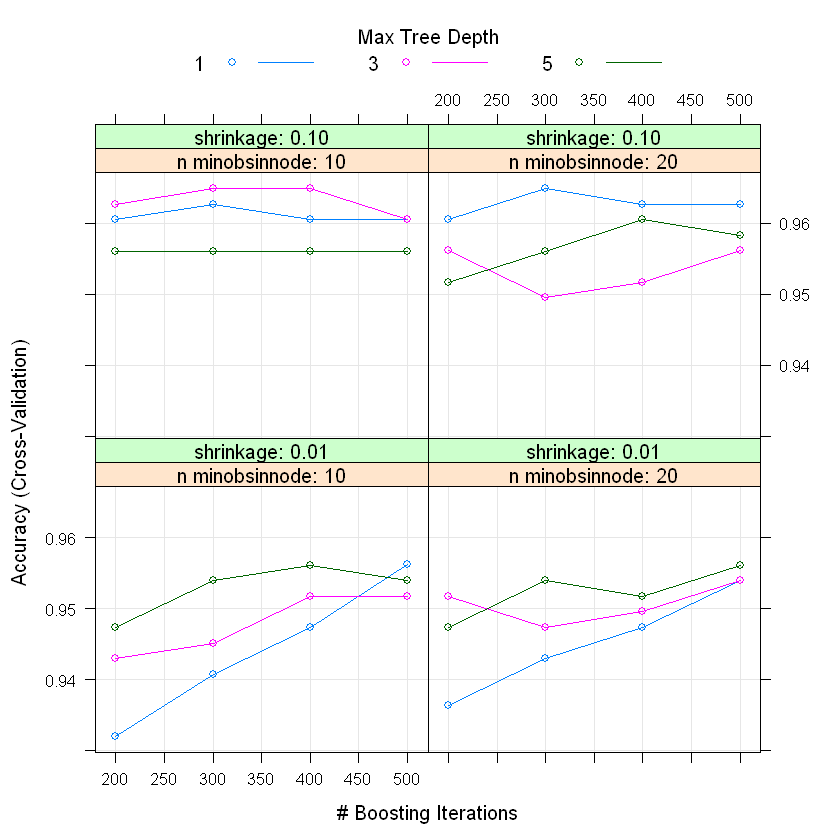

In [64]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(200,300,400,500),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.01 and C = 6

In [65]:
library(kernlab)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.01), C=6, cross=10)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 6 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 60 

Objective Function Value : -196.0341 
Training error : 0.010965 
Cross validation error : 0.030725 


#### Save and load the final model

In [66]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [67]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 6 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 60 

Objective Function Value : -196.0341 
Training error : 0.010965 
Cross validation error : 0.030725 


#### Final Model Evaluation with Test set

In [68]:
predictions = predict(final.model, newdata = test_set[-2])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 70  3
         M  1 39
                                          
               Accuracy : 0.9646          
                 95% CI : (0.9118, 0.9903)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9235          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9859          
            Specificity : 0.9286          
         Pos Pred Value : 0.9589          
         Neg Pred Value : 0.9750          
             Prevalence : 0.6283          
         Detection Rate : 0.6195          
   Detection Prevalence : 0.6460          
      Balanced Accuracy : 0.9572          
                                          
       'Positive' Class : B               
                                          

## Summary

- Best model: **SVM** w/ param: sigma=0.01, C=6


- Accuracy of test set: **96.5%**